<a href="https://colab.research.google.com/github/chinhhadl-rgb/baocaottnt/blob/main/baocao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
from typing import Optional, Tuple

# Kích thước bàn cờ tối thiểu và tối đa
KICH_THUOC_TOI_THIEU = 2
KICH_THUOC_TOI_DA = 5


class BanCo:
    """Lớp biểu diễn bàn cờ N x N cho trò chơi Tic-Tac-Toe mở rộng."""

    def __init__(self, kich_thuoc: int):
        self.kich_thuoc = kich_thuoc
        # Ma trận lưu trạng thái bàn cờ
        self.o_trong = [[' ' for _ in range(kich_thuoc)] for _ in range(kich_thuoc)]

    def hien_thi(self) -> None:
        """Hiển thị bàn cờ ra màn hình."""
        for i in range(self.kich_thuoc):
            print(" | ".join(self.o_trong[i]))
            if i < self.kich_thuoc - 1:
                print("-" * (self.kich_thuoc * 4 - 3))

    def o_trong_tai(self, hang: int, cot: int) -> bool:
        """Kiểm tra ô (hang, cot) có trống không."""
        return self.o_trong[hang][cot] == ' '

    def dat_nuoc_di(self, hang: int, cot: int, ky_hieu: str) -> None:
        """Đặt ký hiệu vào ô (hang, cot)."""
        self.o_trong[hang][cot] = ky_hieu

    def huy_nuoc_di(self, hang: int, cot: int) -> None:
        """Hủy nước đi tại ô (hang, cot) để quay lui."""
        self.o_trong[hang][cot] = ' '

    def ban_co_day(self) -> bool:
        """Kiểm tra bàn cờ đã đầy chưa."""
        return all(cell != ' ' for hang in self.o_trong for cell in hang)

    def kiem_tra_nguoi_thang(self) -> Optional[str]:
        """Kiểm tra xem có người thắng không."""
        n = self.kich_thuoc
        b = self.o_trong

        # Kiểm tra các hàng
        for i in range(n):
            if b[i][0] != ' ' and all(b[i][j] == b[i][0] for j in range(n)):
                return b[i][0]

        # Kiểm tra các cột
        for j in range(n):
            if b[0][j] != ' ' and all(b[i][j] == b[0][j] for i in range(n)):
                return b[0][j]

        # Kiểm tra đường chéo chính
        if b[0][0] != ' ' and all(b[i][i] == b[0][0] for i in range(n)):
            return b[0][0]

        # Kiểm tra đường chéo phụ
        if b[0][n - 1] != ' ' and all(b[i][n - 1 - i] == b[0][n - 1] for i in range(n)):
            return b[0][n - 1]

        return None


class NguoiChoi:
    """Lớp cơ sở cho người chơi."""

    def __init__(self, ky_hieu: str):
        self.ky_hieu = ky_hieu

    def lay_nuoc_di(self, ban_co: BanCo) -> Tuple[int, int]:
        raise NotImplementedError


class NguoiChoiNgươi(NguoiChoi):
    """Người chơi là con người."""

    def lay_nuoc_di(self, ban_co: BanCo) -> Tuple[int, int]:
        n = ban_co.kich_thuoc
        while True:
            try:
                nhap = input(f"Nhập hàng (0-{n-1}): ").strip()
                if nhap.lower() in ['q', 'quit']:
                    print("Thoát trò chơi.")
                    sys.exit(0)

                hang = int(nhap)
                cot = int(input(f"Nhập cột (0-{n-1}): ").strip())

                if 0 <= hang < n and 0 <= cot < n and ban_co.o_trong_tai(hang, cot):
                    return hang, cot
                else:
                    print("Nước đi không hợp lệ! Ô đã bị chiếm hoặc ngoài phạm vi.")
            except ValueError:
                print("Vui lòng nhập số nguyên hợp lệ!")


class NguoiChoiAI(NguoiChoi):
    """Người chơi máy với thuật toán Minimax có cắt tỉa Alpha-Beta."""

    def __init__(self, ky_hieu: str):
        super().__init__(ky_hieu)
        self.ky_hieu_doi_thu = 'O' if ky_hieu == 'X' else 'X'

    def danh_gia(self, ban_co: BanCo) -> int:
        """Đánh giá trạng thái bàn cờ."""
        nguoi_thang = ban_co.kiem_tra_nguoi_thang()
        if nguoi_thang == self.ky_hieu:
            return 1
        if nguoi_thang == self.ky_hieu_doi_thu:
            return -1
        return 0

    def minimax(self, ban_co: BanCo, alpha: int, beta: int, la_luot_ai: bool) -> int:
        """Thuật toán Minimax với cắt tỉa Alpha-Beta."""
        diem = self.danh_gia(ban_co)
        if diem != 0 or ban_co.ban_co_day():
            return diem

        n = ban_co.kich_thuoc

        if la_luot_ai:
            diem_tot_nhat = -1000
            for i in range(n):
                for j in range(n):
                    if ban_co.o_trong_tai(i, j):
                        ban_co.dat_nuoc_di(i, j, self.ky_hieu)
                        diem_tot_nhat = max(
                            diem_tot_nhat,
                            self.minimax(ban_co, alpha, beta, False)
                        )
                        ban_co.huy_nuoc_di(i, j)
                        alpha = max(alpha, diem_tot_nhat)
                        if beta <= alpha:
                            return diem_tot_nhat
            return diem_tot_nhat
        else:
            diem_tot_nhat = 1000
            for i in range(n):
                for j in range(n):
                    if ban_co.o_trong_tai(i, j):
                        ban_co.dat_nuoc_di(i, j, self.ky_hieu_doi_thu)
                        diem_tot_nhat = min(
                            diem_tot_nhat,
                            self.minimax(ban_co, alpha, beta, True)
                        )
                        ban_co.huy_nuoc_di(i, j)
                        beta = min(beta, diem_tot_nhat)
                        if beta <= alpha:
                            return diem_tot_nhat
            return diem_tot_nhat

    def lay_nuoc_di(self, ban_co: BanCo) -> Tuple[int, int]:
        """Tìm nước đi tốt nhất cho AI."""
        diem_tot_nhat = -1000
        nuoc_di_tot_nhat = (-1, -1)
        n = ban_co.kich_thuoc

        for i in range(n):
            for j in range(n):
                if ban_co.o_trong_tai(i, j):
                    ban_co.dat_nuoc_di(i, j, self.ky_hieu)
                    diem_nuoc_di = self.minimax(ban_co, -1000, 1000, False)
                    ban_co.huy_nuoc_di(i, j)

                    if diem_nuoc_di > diem_tot_nhat:
                        diem_tot_nhat = diem_nuoc_di
                        nuoc_di_tot_nhat = (i, j)

        return nuoc_di_tot_nhat


class TroChoi:
    """Lớp quản lý toàn bộ trò chơi."""

    def __init__(self):
        self.kich_thuoc = self.nhap_kich_thuoc()
        self.ban_co = BanCo(self.kich_thuoc)
        self.nguoi_choi_nguoi = NguoiChoiNgươi('O')
        self.nguoi_choi_ai = NguoiChoiAI('X')

    def nhap_kich_thuoc(self) -> int:
        """Yêu cầu người dùng nhập kích thước bàn cờ hợp lệ."""
        while True:
            try:
                n = int(input(f"Nhập kích thước bàn cờ ({KICH_THUOC_TOI_THIEU}-{KICH_THUOC_TOI_DA}): "))
                if KICH_THUOC_TOI_THIEU <= n <= KICH_THUOC_TOI_DA:
                    return n
                else:
                    print(f"Vui lòng nhập số từ {KICH_THUOC_TOI_THIEU} đến {KICH_THUOC_TOI_DA}!")
            except ValueError:
                print("Vui lòng nhập một số nguyên!")

    def choi(self) -> None:
        """Vòng lặp chính của trò chơi."""
        luot = 'X'

        while True:
            print("\n" + "=" * 30)
            self.ban_co.hien_thi()
            print("=" * 30)

            if luot == 'X':
                print("Lượt của Máy (X)... đang suy nghĩ...")
                hang, cot = self.nguoi_choi_ai.lay_nuoc_di(self.ban_co)
            else:
                print("Lượt của Bạn (O)")
                hang, cot = self.nguoi_choi_nguoi.lay_nuoc_di(self.ban_co)

            self.ban_co.dat_nuoc_di(hang, cot, luot)

            nguoi_thang = self.ban_co.kiem_tra_nguoi_thang()
            if nguoi_thang:
                print("\n" + "=" * 30)
                self.ban_co.hien_thi()
                print("=" * 30)
                if nguoi_thang == 'X':
                    print("Máy thắng! Chúc mừng trí tuệ nhân tạo!")
                else:
                    print("Bạn đã thắng!")
                break

            if self.ban_co.ban_co_day():
                print("\n" + "=" * 30)
                self.ban_co.hien_thi()
                print("=" * 30)
                print("Hòa! Không ai thắng.")
                break

            luot = 'O' if luot == 'X' else 'X'

        while True:
            choi_lai = input("\nBạn có muốn chơi lại? (c/k): ").strip().lower()
            if choi_lai in ['c', 'co', 'yes', 'y']:
                TroChoi().choi()
                return
            elif choi_lai in ['k', 'khong', 'no', 'n']:
                print("Cảm ơn bạn đã chơi! Tạm biệt!")
                return
            else:
                print("Vui lòng trả lời 'c' hoặc 'k'.")


if __name__ == "__main__":
    print("Chào mừng bạn đến với trò chơi Tic-Tac-Toe N x N!")
    print("Máy sẽ là X (đi trước), bạn là O.")
    print("Nhập 'q' bất kỳ lúc nào để thoát.\n")
    TroChoi().choi()


Chào mừng bạn đến với trò chơi Tic-Tac-Toe N x N!
Máy sẽ là X (đi trước), bạn là O.
Nhập 'q' bất kỳ lúc nào để thoát.

Nhập kích thước bàn cờ (2-5): 2

  |  
-----
  |  
Lượt của Máy (X)... đang suy nghĩ...

X |  
-----
  |  
Lượt của Bạn (O)
Nhập hàng (0-1): 1
Nhập cột (0-1): 1

X |  
-----
  | O
Lượt của Máy (X)... đang suy nghĩ...

X | X
-----
  | O
Máy thắng! Chúc mừng trí tuệ nhân tạo!

Bạn có muốn chơi lại? (c/k): k
Cảm ơn bạn đã chơi! Tạm biệt!


CHƯƠNG TRÌNH ĐỒ THỊ – OOP
1 → Tô màu đồ thị
2 → Bài toán người bán hàng (TSP)
Chọn (1 hoặc 2): 2

Upload file dữ liệu:


Saving duongdi.txt to duongdi (1).txt
KẾT QUẢ BÀI TOÁN TSP
Chu trình tối ưu:
Hà Nội → Hội An → Đà Lạt → Vũng Tàu → Huế → Nha Trang → Cần Thơ → Hải Phòng → Đà Nẵng → TP.HCM → Hà Nội → Hà Nội
Tổng chi phí: 216 km



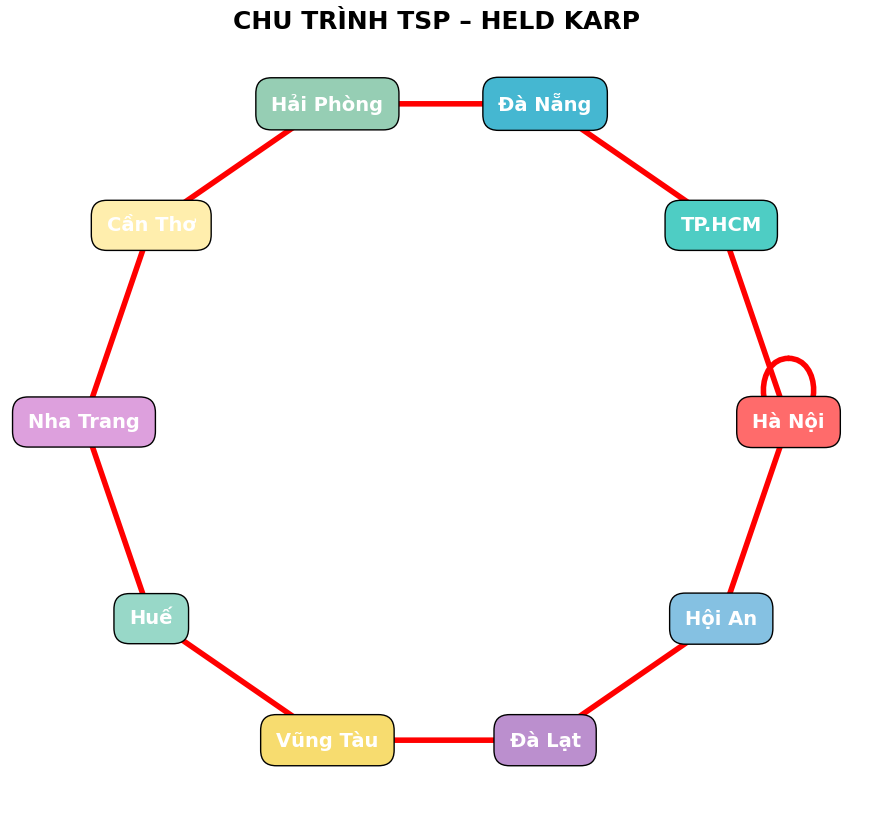

In [11]:
import networkx as nx              # Thư viện biểu diễn và vẽ đồ thị
import matplotlib.pyplot as plt    # Thư viện vẽ hình
from google.colab import files     # Upload file trong Google Colab
from typing import List, Tuple

%matplotlib inline

MAU_DINH = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD',
            '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']
# Danh sách màu dùng để tô các đỉnh

TEN_THANH_PHO = ["Hà Nội", "TP.HCM", "Đà Nẵng", "Hải Phòng", "Cần Thơ",
                 "Nha Trang", "Huế", "Vũng Tàu", "Đà Lạt", "Hội An",
                 "Hạ Long", "Quy Nhơn", "Phan Thiết", "Buôn Ma Thuột", "Pleiku"]
# Tên thành phố dùng cho bài toán TSP

MAU_THANH_PHO = MAU_DINH + ['#FF9FF3', '#54A0FF', '#48DBFB', '#1DD1A1', '#FF9F43']
# Màu riêng cho từng thành phố khi vẽ TSP

IN_DAM = "\033[1m"                 # Bật in đậm chữ
KET_THUC = "\033[0m"               # Kết thúc in đậm


class GraphColoring:
    def __init__(self):
        self.graph = []            # Ma trận kề của đồ thị
        self.colors = []           # Màu gán cho từng đỉnh

    def read_matrix(self, filename: str):
        # Đọc ma trận kề từ file
        with open(filename, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]

        if not lines:
            raise ValueError("File ma trận kề rỗng!")

        n = len(lines)
        self.graph = []

        for i, line in enumerate(lines):
            row = list(map(int, line.split()))
            if len(row) != n:
                raise ValueError(f"Lỗi dòng {i+1}")  # Ma trận không vuông
            self.graph.append(row)

    def greedy_coloring(self):
        # Thuật toán tô màu đồ thị Greedy
        n = len(self.graph)
        self.colors = [-1] * n      # -1 nghĩa là chưa tô màu

        for u in range(n):          # Duyệt từng đỉnh
            used = set()            # Các màu đã dùng bởi đỉnh kề

            for v in range(n):
                if self.graph[u][v] == 1 and self.colors[v] != -1:
                    used.add(self.colors[v])

            c = 0                   # Chọn màu nhỏ nhất chưa bị dùng
            while c in used:
                c += 1

            self.colors[u] = c      # Gán màu cho đỉnh u

    def show_result(self):
        # In kết quả tô màu
        print(f"{IN_DAM}KẾT QUẢ TÔ MÀU ĐỒ THỊ{KET_THUC}")
        for i, c in enumerate(self.colors):
            print(f"   Đỉnh {i:<2} → Màu {c}")
        print(f"\n Số màu sử dụng: {max(self.colors) + 1}\n")

    def draw_graph(self):
        # Vẽ đồ thị đã tô màu
        n = len(self.graph)
        G = nx.Graph()
        G.add_nodes_from(range(n))

        for i in range(n):
            for j in range(i+1, n):
                if self.graph[i][j]:
                    G.add_edge(i, j)

        pos = nx.spring_layout(G, seed=42)  # Bố trí đỉnh
        node_colors = [MAU_DINH[c % len(MAU_DINH)] for c in self.colors]

        plt.figure(figsize=(10, 8))
        nx.draw(G, pos,
                node_color=node_colors,
                node_size=2800,
                with_labels=True,
                font_size=16,
                font_color='white',
                edge_color='black',
                width=2)

        plt.title(f"TÔ MÀU ĐỒ THỊ (GREEDY)\nSố màu = {max(self.colors) + 1}",
                  fontsize=18, fontweight='bold')
        plt.axis('off')
        plt.show()


class TSP:
    def __init__(self):
        self.dist = []              # Ma trận khoảng cách
        self.cost = 0               # Chi phí nhỏ nhất
        self.path = []              # Chu trình tối ưu

    def read_distance_matrix(self, filename: str):
        # Đọc ma trận khoảng cách từ file
        with open(filename, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]

        if not lines:
            raise ValueError("File ma trận khoảng cách rỗng!")

        self.dist = [list(map(int, line.split())) for line in lines]

    def held_karp(self):
        # Thuật toán Held–Karp (DP + Bitmask) cho TSP
        n = len(self.dist)
        INF = float('inf')

        dp = [[INF]*n for _ in range(1<<n)]      # dp[mask][u]
        parent = [[-1]*n for _ in range(1<<n)]   # Truy vết

        dp[1][0] = 0                             # Bắt đầu từ đỉnh 0

        for mask in range(1<<n):
            for u in range(n):
                if dp[mask][u] == INF:
                    continue
                for v in range(n):
                    if not mask & (1<<v) and self.dist[u][v] > 0:
                        nm = mask | (1<<v)
                        if dp[nm][v] > dp[mask][u] + self.dist[u][v]:
                            dp[nm][v] = dp[mask][u] + self.dist[u][v]
                            parent[nm][v] = u

        full = (1<<n) - 1
        self.cost = INF
        last = -1

        for i in range(1, n):
            if dp[full][i] + self.dist[i][0] < self.cost:
                self.cost = dp[full][i] + self.dist[i][0]
                last = i

        self.path = [0]
        mask = full
        u = last

        while u != -1:
            self.path.append(u)
            pu = parent[mask][u]
            mask ^= (1<<u)
            u = pu

        self.path.reverse()

    def show_result(self):
        # In kết quả TSP
        ten = TEN_THANH_PHO[:len(self.dist)]
        print(f"{IN_DAM}KẾT QUẢ BÀI TOÁN TSP{KET_THUC}")
        print("Chu trình tối ưu:")
        print(" → ".join(ten[i] for i in self.path) + f" → {ten[0]}")
        print(f"Tổng chi phí: {self.cost} km\n")

    def draw_tour(self):
        # Vẽ chu trình TSP
        n = len(self.dist)
        ten = TEN_THANH_PHO[:n]
        G = nx.complete_graph(n)
        pos = nx.circular_layout(G)

        plt.figure(figsize=(11, 10))
        for i in range(n):
            x, y = pos[i]
            plt.text(x, y, ten[i],
                     ha='center', va='center', color='white',
                     fontsize=14, fontweight='bold',
                     bbox=dict(facecolor=MAU_THANH_PHO[i], boxstyle='round,pad=0.8'))

        edges = [(self.path[i], self.path[(i+1)%len(self.path)]) for i in range(len(self.path))]
        nx.draw_networkx_edges(G, pos, edgelist=edges,
                               edge_color='red', width=4, arrows=True)

        plt.title("CHU TRÌNH TSP – HELD KARP",
                  fontsize=18, fontweight='bold')
        plt.axis('off')
        plt.show()


class GraphApp:
    def run(self):
        # Điều phối chương trình
        print(f"{IN_DAM}CHƯƠNG TRÌNH ĐỒ THỊ – OOP{KET_THUC}")
        print("1 → Tô màu đồ thị")
        print("2 → Bài toán người bán hàng (TSP)")

        choice = input("Chọn (1 hoặc 2): ").strip()

        print("\nUpload file dữ liệu:")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]

        if choice == "1":
            app = GraphColoring()
            app.read_matrix(filename)
            app.greedy_coloring()
            app.show_result()
            app.draw_graph()
        elif choice == "2":
            app = TSP()
            app.read_distance_matrix(filename)
            app.held_karp()
            app.show_result()
            app.draw_tour()
        else:
            print(" Lựa chọn không hợp lệ!")


GraphApp().run()   # Chạy chương trình


1. K-means – Dữ liệu ngẫu nhiên
2. K-means – Dữ liệu tự nhập
3. K-NN – Dữ liệu ngẫu nhiên
4. K-NN – Dữ liệu tự nhập
0. Thoát
Chọn: 3

--- K-NN (DỮ LIỆU NGẪU NHIÊN) ---
Nhập số điểm huấn luyện: 200
Nhập số láng giềng k: 7
Nhập điểm cần dự đoán (x y): 3 5 
Kết quả dự đoán: Lớp 1


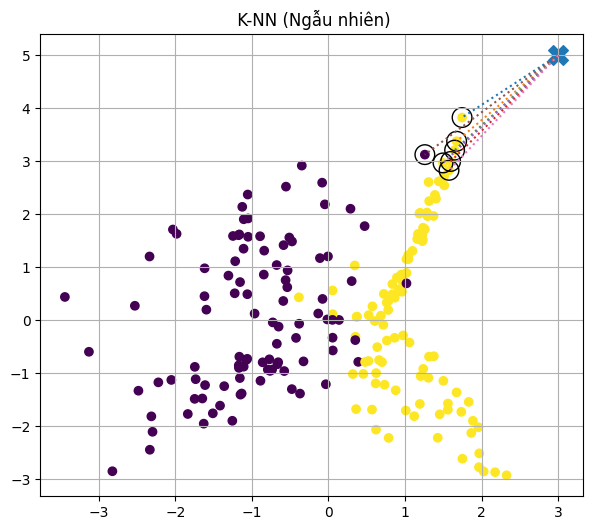


1. K-means – Dữ liệu ngẫu nhiên
2. K-means – Dữ liệu tự nhập
3. K-NN – Dữ liệu ngẫu nhiên
4. K-NN – Dữ liệu tự nhập
0. Thoát


KeyboardInterrupt: Interrupted by user

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs, make_classification
def bai1_kmeans_ngau_nhien():
    print("\n---  K-MEANS (DỮ LIỆU NGẪU NHIÊN) ---")
    # Nhập số điểm dữ liệu
    n = int(input("Nhập số điểm dữ liệu: "))
    # Nhập số cụm k
    k = int(input("Nhập số cụm k: "))
    # Sinh dữ liệu ngẫu nhiên gồm n điểm, chia thành k cụm
    X, _ = make_blobs(n_samples=n, centers=k, random_state=0)
    # Khởi tạo mô hình KMeans với k cụm
    kmeans = KMeans(n_clusters=k, random_state=0)
    # Huấn luyện mô hình trên dữ liệu X
    kmeans.fit(X)
    # Nhãn cụm của từng điểm
    labels = kmeans.labels_
    # Tọa độ tâm các cụm
    centers = kmeans.cluster_centers_
    print("\nTâm các cụm:")
    for i in range(k):
        print(f"Cụm {i}: {centers[i]}")
    # Vẽ các điểm dữ liệu theo màu cụm
    plt.figure(figsize=(7,6))
    plt.scatter(X[:,0], X[:,1], c=labels)
    # Vẽ tâm cụm bằng dấu X
    plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
    plt.title("Bài 1: K-means (Ngẫu nhiên)")
    plt.grid(True)
    plt.show()
def bai2_kmeans_tu_nhap():
    print("\n---  K-MEANS (DỮ LIỆU TỰ NHẬP) ---")
    # Nhập số điểm dữ liệu
    n = int(input("Nhập số điểm dữ liệu: "))
    X = []
    # Nhập tọa độ từng điểm
    for i in range(n):
        x = float(input(f"x{i+1}: "))
        y = float(input(f"y{i+1}: "))
        X.append([x, y])
    # Chuyển danh sách sang mảng numpy
    X = np.array(X)
    # Nhập số cụm k
    k = int(input("Nhập số cụm k: "))
    # Kiểm tra điều kiện k hợp lệ
    if k > n:
        print("Lỗi: k > số điểm!")
        return
    # Khởi tạo và huấn luyện KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    print("\nKết quả phân cụm:")
    for i in range(n):
        print(f"Điểm {X[i]} → cụm {labels[i]}")
    # Vẽ dữ liệu và tâm cụm
    plt.figure(figsize=(7,6))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
    plt.title("Bài 2: K-means (Tự nhập)")
    plt.grid(True)
    plt.show()
def bai3_knn_ngau_nhien():
    print("\n--- K-NN (DỮ LIỆU NGẪU NHIÊN) ---")
    # Nhập số điểm huấn luyện
    n = int(input("Nhập số điểm huấn luyện: "))
    # Nhập số láng giềng k
    k = int(input("Nhập số láng giềng k: "))
    # Sinh dữ liệu phân lớp ngẫu nhiên 2 lớp
    X, y = make_classification(
        n_samples=n,
        n_features=2,
        n_redundant=0,
        n_classes=2,
        random_state=0
    )
    # Kiểm tra điều kiện k hợp lệ
    if k > n:
        print(" Lỗi: k > số điểm huấn luyện!")
        return
    # Khởi tạo và huấn luyện KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Nhập điểm cần dự đoán
    x_test, y_test = map(float, input("Nhập điểm cần dự đoán (x y): ").split())

    # Dự đoán nhãn của điểm mới
    du_doan = knn.predict([[x_test, y_test]])
    print(f"Kết quả dự đoán: Lớp {du_doan[0]}")

    # Lấy khoảng cách và chỉ số k láng giềng gần nhất
    distances, indices = knn.kneighbors([[x_test, y_test]])

    # Vẽ dữ liệu huấn luyện
    plt.figure(figsize=(7,6))
    plt.scatter(X[:,0], X[:,1], c=y)

    # Vẽ điểm cần dự đoán
    plt.scatter(x_test, y_test, marker='X', s=200)

    # Vẽ các láng giềng gần nhất
    for i in indices[0]:
        plt.scatter(X[i,0], X[i,1], facecolors='none', edgecolors='black', s=200)
        plt.plot([x_test, X[i,0]], [y_test, X[i,1]], linestyle='dotted')
    plt.title(" K-NN (Ngẫu nhiên)")
    plt.grid(True)
    plt.show()
def bai4_knn_tu_nhap():
    print("\n---  K-NN (DỮ LIỆU TỰ NHẬP) ---")
    # Nhập số điểm huấn luyện
    n = int(input("Nhập số điểm huấn luyện: "))
    X = []
    y = []
    # Nhập dữ liệu và nhãn lớp
    for i in range(n):
        x = float(input(f"x{i+1}: "))
        y_ = float(input(f"y{i+1}: "))
        label = input("Nhãn lớp: ")
        X.append([x, y_])
        y.append(label)
    X = np.array(X)
    # Nhập số láng giềng k
    k = int(input("Nhập số láng giềng k: "))
    if k > n:
        print(" Lỗi: k > số điểm huấn luyện!")
        return
    # Huấn luyện KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    # Nhập điểm cần dự đoán
    x_test = float(input("x cần dự đoán: "))
    y_test = float(input("y cần dự đoán: "))
    # Dự đoán nhãn
    du_doan = knn.predict([[x_test, y_test]])
    print(f"Kết quả dự đoán: {du_doan[0]}")
    distances, indices = knn.kneighbors([[x_test, y_test]])
    # Vẽ các điểm theo từng lớp
    plt.figure(figsize=(7,6))
    for lbl in set(y):
        idx = [i for i,v in enumerate(y) if v == lbl]
        plt.scatter(X[idx,0], X[idx,1], label=f"Lớp {lbl}")
    # Vẽ điểm cần dự đoán
    plt.scatter(x_test, y_test, marker='X', s=200)
    # Vẽ các láng giềng gần nhất
    for i in indices[0]:
        plt.scatter(X[i,0], X[i,1], facecolors='none', edgecolors='black', s=200)
        plt.plot([x_test, X[i,0]], [y_test, X[i,1]], linestyle='dotted')
    plt.legend()
    plt.title("Bài 4: K-NN (Tự nhập)")
    plt.grid(True)
    plt.show()
def menu():
    while True:
        print("\n==============================")
        print("1. K-means – Dữ liệu ngẫu nhiên")
        print("2. K-means – Dữ liệu tự nhập")
        print("3. K-NN – Dữ liệu ngẫu nhiên")
        print("4. K-NN – Dữ liệu tự nhập")
        print("0. Thoát")
        chon = input("Chọn: ")
        if chon == "1":
            bai1_kmeans_ngau_nhien()
        elif chon == "2":
            bai2_kmeans_tu_nhap()
        elif chon == "3":
            bai3_knn_ngau_nhien()
        elif chon == "4":
            bai4_knn_tu_nhap()
        elif chon == "0":
            break
        else:
            print(" Lựa chọn sai!")

menu()
